# Ampliación de Matemáticas. Curso 2021-22.
## Máster INO, ETSI Navales, UPM

## Control 2.

## Nombre, apellidos y DNI: 

In [1]:
#Librerías que vamos a usar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as integ
import scipy.interpolate as interp
from scipy.optimize import root

## Apartado 0

 - (1p.) Explica qué aproxima la gráfica etiquetada "D" abajo.
 - (1p.) Explica qué método numérico se ha usado y da una cota del error cometido.

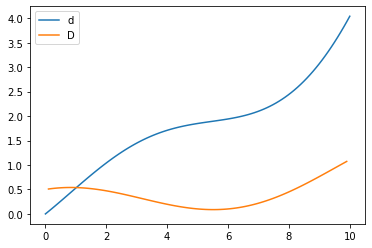

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def D(f, a, b, n):
    h = (b - a)/n
    ds = np.zeros(n-2)
    for j in range(n-2):
        xj = a + h*(j+1)
        ds[j] = f(xj+h) - f(xj-h)
    return ds/(2*h)

def f(x):
    return x**2/20 + np.sin(x/2)
a, b, n = 0, 10, 100
xs = np.linspace(a, b, n)
plt.plot(xs, f(xs), label='d')
plt.plot(xs[1:-1], D(f, a, b, n), label='D')
plt.legend()

> - Es una aproximación a la primera derivada de `x**2/20 + np.sin(x/2)` mediante una diferencia centrada, un método numérico de orden 2.
> - El error cometido es menor que $\frac{h^2}{6}\max_{x_*-h\leq\xi\leq x_*+h} |f'''(\xi)|$. Necesitamos calcular la tercera derivada:
>  + `fp = x/10 + np.cos(x/2)/2`
>  + `fpp = 1/10 - np.sin(x/2)/4`
>  + `fppp = - np.cos(x/2)/8`
> - Acotando la tercera derivada por 1/8, usando que $h=1/10$, la cota es $\frac{h^2}{6}\frac{1}{8}=\frac{1}{4800}$.
> - (opcional) El análisis anterior estima el error de truncamiento. Podemos incorporar el error de redondeo, aunque el resultado final no varía mucho porque $h$ es muy grande y el error de redondeo en derivación numérica solo aparece para $h$ muy pequeño:
$$ \frac{\varepsilon}{h} + \frac{h^2}{6}\max_{x_*-h\leq\xi\leq x_*+h} |f'''(\xi)|. $$
> - concretando, el error total sería menor que $\frac{\varepsilon}{h}+\frac{h^2}{6}\frac{1}{8}=\frac{2e-16}{0.1}+\frac{1}{4800}\approx 2e-4$

In [3]:
np.finfo(float).eps/0.1 + 1/4800

0.0002083333333355538

Consideramos la ecuación diferencial:

$$ \ddot{x} = x(1 - x^2) - \dot{x}. $$ 

## Apartado 1

- (1p.) Escribe la ecuación diferencial anterior como un sistema de ecuaciones de orden uno.
- (1p.) Calcula sus puntos de equilibrio.

> - Introducimos v = dx/dt:
>   + `dxdt = v`
>   + `dvdt = x*(1 - x**2) - v`

> - El sistema es autónomo, sus puntos de equilibrio son las soluciones constantes, para las que dxdt y dvdt son ambos cero. Por tanto, $x(1-x^2)=0$, lo que ocurre si y solo si $x=0$, $x=1$ ó $x=-1$.

## Apartado 2 (2p.)

Resuelve numéricamente el sistema obtenido en el apartado anterior en el intervalor de tiempo $[0,20]$ y con condiciones iniciales $x(0)=1, \dot{x}(0)=0.05$

- usando el método de Euler con $h=0.1$.
- usando `solve_ivp`.
- Representa la diferencia entre las dos soluciones en los mismos instantes de tiempo. ¿Se aprecia una diferencia entre los dos métodos?

In [4]:
y0 = [1, .05]
t0, tf = 0, 20

def fun(t, ys):
    x, v = ys
    return np.array([v, x*(1-x**2) - v])

In [5]:
def euler(f, y0, t0, tf, N):
    '''Resuelve y=f(t,y) mediante el método de Euler
    
    INPUTS:
     - f: función de t, y
     - y0: valor inicial (se espera un array)
     - t0, tf: intervalo de integración
     - N: número de subdivisiones del intervalo de integración
          (el paso h es (tf-t0)/N)
    '''
    h = (tf - t0)/N
    ts = np.linspace(t0, tf, N+1)
    tj = 0
    #admitimos que el argumento y0 sea "list", pero lo convertimos a array
    yj = np.array(y0)
    d = yj.shape[0]
    ys = np.zeros((d,N+1))
    for j in range(N+1):
        ys[:,j] = yj
        yj = yj + h*f(tj, yj)
        tj = tj + h
    return ts, ys

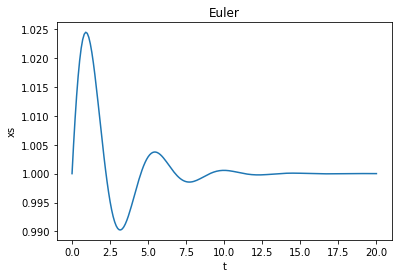

In [6]:
# Para que h = (tf - t0)/N sea 0.1, N debe ser 200
N = 200
ts_euler, ys_euler = euler(fun, y0, t0, tf, N)
xs_euler = ys_euler[0,:]

plt.plot(ts_euler, xs_euler, label='euler')
plt.xlabel('t')
plt.ylabel('xs')
plt.title('Euler')
plt.show()

Text(0.5, 1.0, 'solve_ivp')

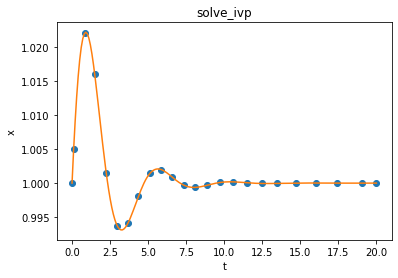

In [7]:
t_span = [t0, tf]
sol = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45')

t_eval = np.linspace(t0, tf, 200)
sol_densa = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45',
    t_eval=t_eval
)

plt.plot(sol['t'], sol['y'][0,:], 'o')
plt.plot(sol_densa['t'], sol_densa['y'][0,:], '-')
plt.xlabel('t')
plt.ylabel('x')
plt.title('solve_ivp')

> - Representa la diferencia entre las dos soluciones en los mismos instantes de tiempo. ¿Se aprecia una diferencia entre los dos métodos?
> La diferencia es pequeña, aunque apreciable (y mejora al aumentar N): el error máximo es 0.003. Para poder representar la diferencia en puntos equiespaciados, hemos pedido a `solve_ivp` que interpole los puntos obtenidos con RK45.

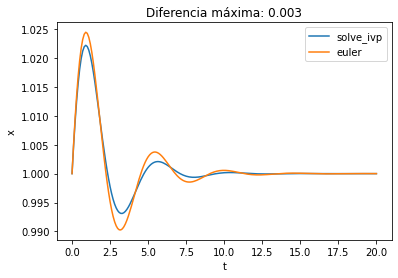

In [8]:
sol_densa = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45',
    t_eval=ts_euler
)

plt.plot(sol_densa['t'], sol_densa['y'][0,:], '-', label='solve_ivp')
plt.plot(ts_euler, xs_euler, label='euler')
plt.xlabel('t')
plt.ylabel('x')
dif_max = max(np.abs(sol_densa['y'][0,:] - xs_euler))
plt.title('Diferencia máxima: %.3f'%dif_max)
plt.legend()

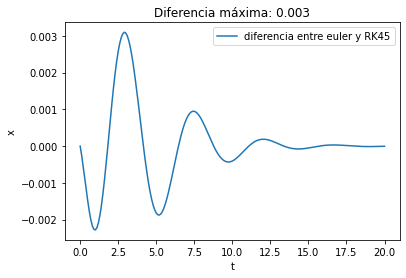

In [9]:
sol_densa = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45',
    t_eval=ts_euler
)

plt.plot(sol_densa['t'], sol_densa['y'][0,:] - xs_euler, label='diferencia entre euler y RK45')
plt.xlabel('t')
plt.ylabel('x')
dif_max = max(np.abs(sol_densa['y'][0,:] - xs_euler))
plt.title('Diferencia máxima: %.3f'%dif_max)
plt.legend()

## Apartado 3 (2p.)

Produce figuras que representen para condiciones iniciales $x(0)=r, \dot{x}(0)=r$ donde $r$ se obtiene tomando $20$ puntos equiespaciados entre $-2$ y $2$:

- Las gráficas de $x(t)$ en el intervalo $[0,20]$ para las distintas condiciones iniciales.
- Las gráficas de $\dot{x}(t)$ en el intervalo $[0,20]$ para las distintas condiciones iniciales.
- El diagrama de fases del sistema, es decir, las curvas $(x(t),\dot{x}(t))$ con $t$ en el intervalo $[0,20]$.

Text(0.5, 1.0, 'x(t) converge a uno de los dos equilibrios estables')

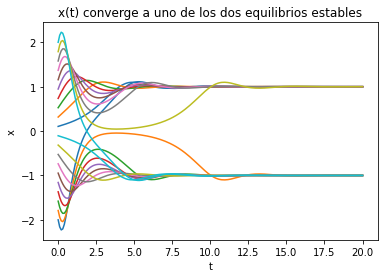

In [10]:
rs = np.linspace(-2, 2, 20)
t_eval = np.linspace(t0, tf, 200)
for r in rs:
    y0 = [r, r]
    sol_densa = integ.solve_ivp(
        fun, t_span, y0, 
        method='RK45',
        t_eval=t_eval
    )

    plt.plot(sol_densa['t'], sol_densa['y'][0,:], '-')
plt.xlabel('t')
plt.ylabel('x')
plt.title('x(t) converge a uno de los dos equilibrios estables')

Text(0.5, 1.0, '$\\dot{x}(t)$ converge a uno de los dos equilibrios estables')

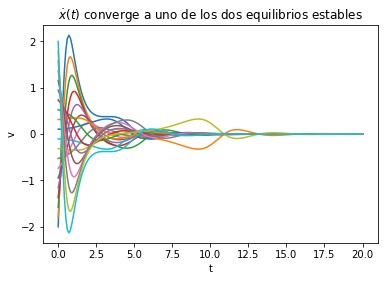

In [11]:
rs = np.linspace(-2, 2, 20)
t_eval = np.linspace(t0, tf, 200)
for r in rs:
    y0 = [r, r]
    sol_densa = integ.solve_ivp(
        fun, t_span, y0, 
        method='RK45',
        t_eval=t_eval
    )

    plt.plot(sol_densa['t'], sol_densa['y'][1,:], '-')
plt.xlabel('t')
plt.ylabel('v')
plt.title('$\dot{x}(t)$ converge a uno de los dos equilibrios estables')

Text(0.5, 1.0, 'Diagrama de fases')

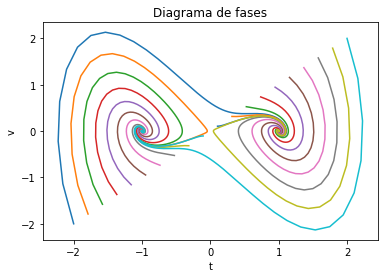

In [12]:
rs = np.linspace(-2, 2, 20)
t_eval = np.linspace(t0, tf, 200)
for r in rs:
    y0 = [r, r]
    sol_densa = integ.solve_ivp(
        fun, t_span, y0, 
        method='RK45',
        t_eval=t_eval
    )

    plt.plot(sol_densa['y'][0,:], sol_densa['y'][1,:], '-')
plt.xlabel('t')
plt.ylabel('v')
plt.title('Diagrama de fases')

> - _Comentarios_: en la primera gráfica observamos que el sistema converge a uno de los dos equilibrios estables, en la segunda que la velocidad converge a cero, y en el diagrama de fases vemos las dos cosas, y el equilibrio inestable x=0, v=0. El código para las tres gráficas es casi idéntico, en el diagrama de fases trazamos $(x(t), v(t))$, mientras que las otras dos gráficas eran $(t, x(t))$ y $(t, v(t))$.

## Apartado 4 (1p.)

Volvemos a la ecuación diferencial anterior. Considera la solución que arranca de $x(0)=1$, $\dot{x}(0)=0.05$ y calcula numéricamente el valor medio de la energía total de la solución:
$$ \int_0^{20} \left( \frac{\dot{x}(t)^2}{2} - \frac{x(t)^2}{2} - \frac{x(t)^3}{3}\right) dt. $$

> - Este apartado se puede resolver de varias formas.


> - 1: Queremos usar un método de cuadratura, pero necesitamos los valores del integrando en puntos equiespaciados, o en los nodos que necesita `quad` => interpolamos, por ejemplo con una spline cúbica:

In [13]:
t0, tf = t_span = [0, 20]
y0 = [1,.05]

sol = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45'
)

xs = sol['y'][0,:]
vs = sol['y'][1,:]
integrando = vs**2/2 - xs**2/2 - xs**3/3
cs3 = interp.CubicSpline(sol['t'], integrando)
integ.quad(cs3, t0, tf)

(-16.71508837438839, 2.0789639779446456e-07)

> - 2: Si tenemos valores de x y de v en puntos equiespaciados podemos usar una regla compuesta como por ejemplo la del trapecio.

In [14]:
N = 200
t_eval = np.linspace(t0, tf, N)
sol_densa = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45',
    t_eval=t_eval
)
xs = sol_densa['y'][0,:]
vs = sol_densa['y'][1,:]
integrando = vs**2/2 - xs**2/2 - xs**3/3
h = (tf - t0)/N
integral_trapecio = (h/2)*(integrando[0] + integrando[-1]) + h*sum(integrando[1:-1])
integral_trapecio

-16.63148978580185

> - 3: Otra opción es ampliar el sistema de edos para que cubra la derivada del integrando:
>   + `dxdt = v`
>   + `dvdt = x*(1 - x**2) - v`
>   + `dedt = v**2/2 - x**2/2 - x**3/3`

In [15]:
def fun_ext(t, ys):
    x, v, e = ys
    return np.array([v, x*(1-x**2) - v, v**2/2 - x**2/2 - x**3/3])

t_span = [t0, tf]
y0 = [1, .05, 0]
t_eval = np.linspace(t0, tf, 200)
sol_densa = integ.solve_ivp(
    fun_ext, t_span, y0, 
    method='RK45',
    t_eval=t_eval
)

energia = sol_densa['y'][-1,:]
# la integral entre 0 y 20
energia[-1]

-16.715146730982205

> - 4 (alternativa de un compañero, parecida a la 2): Si tenemos valores de x y de v en puntos equiespaciados podemos usar una regla compuesta como por ejemplo `integ.simpson`.

In [17]:
N = 200
y0 = [1, .05]
t_eval = np.linspace(t0, tf, N)
sol_densa = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45',
    t_eval=t_eval
)
xs = sol_densa['y'][0,:]
vs = sol_densa['y'][1,:]
integrando = vs**2/2 - xs**2/2 - xs**3/3
h = (tf - t0)/N
integ.simpson(integrando, t_eval)

-16.71514729351572

## Apartado 5 (1,5p.)

Sabemos que la solución con condición inicial $x(0)=1$, $\dot{x}(0)=0.05$ cumple, cuando $t\to\infty$

$$ \dot{x}(t)\approx Ce^{-\alpha t}. $$

En este apartado, vamos a determinar numéricamente los valores $C,\alpha$.

- Crea un array que contenga los valores $\log(|\dot{x}(t_j)|)$ donde $t_j$ son los distintos instantes de tiempo en el que está calculada la solución y representa gráficamente los puntos $(t_j,\log(|\dot{x}(t_j)|)$. 

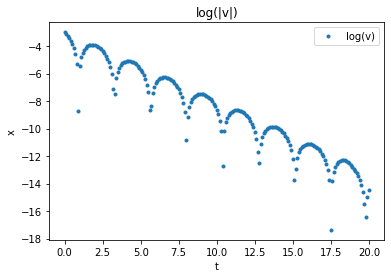

In [18]:
y0 = [1, .05]
t0, tf = 0, 20

sol_densa = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45',
    t_eval=ts_euler
)

xs = sol_densa['y'][0,:]
vs = sol_densa['y'][1,:]
logvs = np.log(np.abs(vs))

plt.plot(sol_densa['t'], logvs, '.', label='log(v)')
plt.xlabel('t')
plt.ylabel('x')
plt.title('log(|v|)')
plt.legend()

- Los valores $\log(|\dot{x}(t_j)|)$ deben cumplir $\log(|\dot{x}(t_j)|)\approx \log C - \alpha t_j$. Utiliza la aproximación mediante polinomios lineales para calcular los valores $\log C$ y $\alpha$. Representa gráficamente la gráfica resultante.

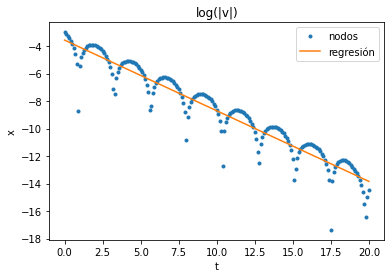

In [19]:
ts = sol_densa['t']
menos_alfa, logC = np.polyfit(ts, logvs, 1)
plt.plot(ts, logvs, '.', label='nodos')
plt.plot(ts, menos_alfa*ts+logC, '-', label='regresión')
plt.xlabel('t')
plt.ylabel('x')
plt.title('log(|v|)')
plt.legend()

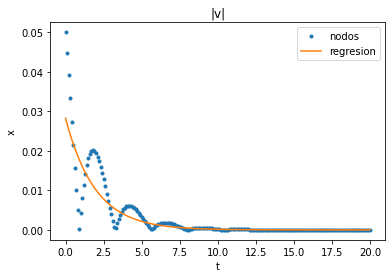

In [20]:
ts = sol_densa['t']
plt.plot(ts, np.abs(vs), '.', label='nodos')
plt.plot(ts, np.exp(menos_alfa*ts+logC), '-', label='regresion')
plt.xlabel('t')
plt.ylabel('x')
plt.title('|v|')
plt.legend()

## Apartado 6 (1,5p.)

Queremos aproximar la integral 

$$\int_0^{10} e^{-x^2} dx $$

mediante la regla del trapecio compuesta. ¿Como hemos de elegir $h$ para que el error cometido sea menor que $10^{-2}$?

> - Recordamos el error para la **regla de los trapecios compuesta.** Existe $\eta$ en $[a,b]$ tal que

$$
|E| \leq h^2 \frac{(b-a)}{12}K_2.
$$


$$
K_n:=\max_{x\in [a,b]}|f^{(n)}(x)|,
$$


> - Necesitamos la segunda derivada de $f$:
>   + `fp = exp(-x**2)*(-2*x)`
>   + `fpp = exp(-x**2)*(-2) + exp(-x**2)*(4*x**2)`
> - Para obtener el máximo de `fpp` (de forma aproximada), la evaluamos en 200 puntos del intervalo [0,10]

In [21]:
def f(x):
    return np.exp(-x**2)
def fpp(x):
    return np.exp(-x**2)*(-2 + 4*x**2)
xs = np.linspace(0,10,100)
f2s = fpp(xs)
maxf2 = max(np.abs(f2s))
maxf2

2.0

> - Queremos por tanto que `h**2*2*(10/12)` sea menor que `1e-2`: necesitamos que `h**2` sea menor que `1e-2*12/20`, es decir que h sea menor que

In [22]:
h0 = np.sqrt(1e-2*12/20)
h0

0.07745966692414834

> - _Curiosidad_: el error real es minúsculo, menor que la precisión de la máquina.

In [23]:
i_quad, e_quad = integ.quad(f, 0, 10)
i_quad

0.886226925452758

In [24]:
N = int(10/h0)
xs = np.linspace(0,10,N)
fs = f(xs)
i_trap = integ.trapz(fs, xs)
i_quad, i_trap, N, abs(i_trap - i_quad)

(0.886226925452758, 0.886226925452758, 129, 0.0)

> - Pero es coincidencia, simplemente cambiando el intervalo de integración en 1e-3, el error que comete la regla del trapecio ya es significativo.

In [25]:
i_quad, e_quad = integ.quad(f, 1e-3, 10)
N = int(10/h0)
xs = np.linspace(1e-3,10,N)
fs = f(xs)
i_trap = integ.trapz(fs, xs)
i_quad, i_trap, N, abs(i_trap - i_quad)

(0.8852269257860914, 0.8852279434557739, 129, 1.017669682523703e-06)

> - Otro posible enfoque es estimar el error real cometido. Se puede hacer por fuerza bruta, o por ejemplo por bisección...

In [26]:
i_quad, e_quad = integ.quad(f, 0, 10)
def error_trapecio(N):
    N = int(N)
    xs = np.linspace(0,10,N)
    fs = f(xs)
    return abs(integ.trapz(fs, xs) - i_quad)
# No podemos usar un método como root porque N es necesariamente entero
from scipy.optimize import bisect
bisect(lambda n:error_trapecio(n) - 0.01, 1, 1000, xtol=1e-1, full_output=True)

(8.98760986328125,
       converged: True
            flag: 'converged'
  function_calls: 16
      iterations: 14
            root: 8.98760986328125)

In [27]:
error_trapecio(9)

0.0032013526099348155